# 超級on 9 六合彩分析. 千祈唔好信

小賭養妻活兒, 大賭創業興家

d code 可能會錯. 我唔包正確, 更加唔包發達

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import seaborn as sns

%matplotlib inline

In [2]:
#load training data
lottery_result = pandas.read_csv('mark_six.csv', sep=',', index_col=(0, 1))

In [3]:
display(lottery_result.ix[2015:2019])

C:\Users\ymlai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


N1  N2  N3  N4  N5  N6  S1 Remarks
YEAR TIMES                                    
2015 1      44  42  15  35   8  31  39     NaN
     2      14  16  18   3  49  38  29     NaN
     3       8  28  44  18  37  19  13     NaN
     4      47  21  10  40  24  33   5     NaN
     5      37  40  43  21  27  16  14     NaN
     6      14  49   1  43   2  37  24     NaN
     7      27  14  25  15  30  16  11     NaN
     8      29  13   9  15   5   7  47     NaN
     9      42  30  46   8  21  16  32     NaN
     10     18  17  26  20  32  31   6     NaN
     11      5  10  13  28  35   4  12     NaN
     12     29  25  32   6  15  46   9     NaN
     13     46  47  14   7  17   5  27     NaN
     14     49  43  11  36  47  34  21     NaN
     15     22  18  17  13  16  45  10     NaN
     16     17  18   5   7  27  48  30     NaN
     17     30  23   2  41  34  17  14     NaN
     18     31  14   7  10   9  22  35     NaN
     19     10  25  21  35  12   2  26     NaN
     20     44  22  28  33  14  46  25     NaN
     21     42  46  29  28  15  20  35     NaN
     22     48  17  32  28  33  18  37     NaN
     23     22  20  25  33  12  10  27     NaN
     24     23   6   9  43  25  41  38     NaN
     25     17  25  46  27  13  49  19     NaN
     26     10  38  20   2   6  40  46     NaN
     27     32   8  49   6  16  12  37     NaN
     28     22  45   1  27  48  18  25     NaN
     29     23  14  25  37  24  17  34     NaN
     30     29   4  21  37  25  32  27     NaN
...         ..  ..  ..  ..  ..  ..  ..     ...
2018 135    15  29  27  38   8   7  39     NaN
     136    14  43  34  31  36  25  35     NaN
     137     2  39  29  38  20  32  47     NaN
     138     8  31  11  14  20  22  19     NaN
     139    20  32  40  46   8  44  34     NaN
     140    40  27  45  48  29  20  43     NaN
     141    33   8  42   7  10  20  22     NaN
     142    21  15   1  23  33  24  39     NaN
     143     5  37  33  36  30  10  22     NaN
     144    33  10   1  13  11  30  45     NaN
     145    12  13   7   8   4  26  42     NaN
     146    20  49  48  46  33   7   4     NaN
     147    32  16  47   2  14  41  23     NaN
     148     4  35  17   1  22  23  37     NaN
     149    33   6  46  13   7  35  43     NaN
2019 1      25  23  45  30   8  32  24     NaN
     2      23  13  19  45  16  12   2     NaN
     3      40   4  23   5  12  30  10     NaN
     4       7  31  28   6  36  43  23     NaN
     5      35  48  18  37  49  10  27     NaN
     6      44  33  16  17  10  48   7     NaN
     7      16  18  28  35  41  36  37     NaN
     8      34  47  24  13  31  44   8     NaN
     9      30  33   3  19  25  48  44     NaN
     10     46  41  18  33  43  11  36     NaN
     11     46  14  45  41  27  29  21     NaN
     12     14  45   3  10  24  32  29     NaN
     13     22  26  31  33  41  18  27     NaN
     14      5  35  13   6  34  19  39     NaN
     15     15  19   4  29   2  11   1     NaN

[620 rows x 8 columns]

# Simple strategy: expiloting distribution

The lottery machine is not perfect, it may bias some number more than other. One strategy is to generate random number according to the historical distribution

C:\Users\ymlai\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\ymlai\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


Text(0.5, 1.0, 'All number statistic')

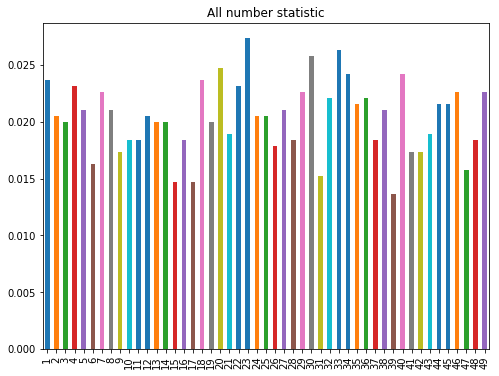

In [34]:
def combine_6_to_1(sample):
    return sample['N1'].append(sample['N2']).append(sample['N3']).append(sample['N4']).append(sample['N5']).append(sample['N6']).reset_index(drop=True)

sample = lottery_result.ix[2017:2019].reset_index(drop=True)
small_sample = lottery_result.ix[2019].reset_index(drop=True)

all_num = combine_6_to_1(sample)
fig = plt.figure(figsize=(8,6))
all_num_cnt = all_num.value_counts().sort_index()
all_num_cnt_norm = all_num_cnt / all_num_cnt.sum()
all_num_cnt_norm.plot.bar()
plt.title('All number statistic')

Text(0.5, 1.0, 'bootstrap sample statistic')

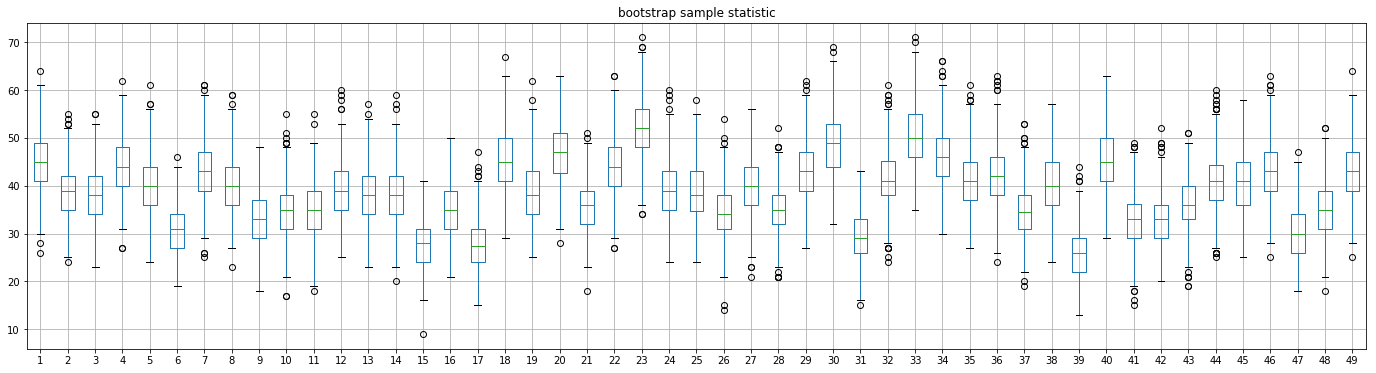

In [35]:
#use bootstrap to find out the a better descriptive statistics
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X.loc[resample_i]
    return X_resample

def num_array_to_hist(values):
    return values.value_counts()

all_df = pandas.DataFrame(data=np.zeros((49, 500)), index=range(1,50))

for i in range(500):
    bootstrap_sample = bootstrap_resample(sample)
    all_num = combine_6_to_1(bootstrap_sample)
    hist_num = num_array_to_hist(all_num)
    all_df[i] = hist_num


fig = plt.figure(figsize=(24,6))
all_df.T.boxplot()
plt.title('bootstrap sample statistic')


In [37]:
all_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,46,53,49,48,54,42,55,44,47,47,...,41,44,55,39,51,50,51,45,50,39
2,32,38,42,37,46,36,46,39,42,37,...,36,48,50,39,49,44,45,38,39,28
3,30,41,44,32,37,36,34,36,46,32,...,35,41,30,44,34,44,27,37,31,34
4,40,38,41,38,49,39,52,37,37,41,...,52,40,42,49,37,39,52,48,52,41
5,44,39,38,35,43,41,35,39,36,50,...,30,39,33,44,40,40,37,32,28,40
6,34,37,24,35,31,33,33,24,42,28,...,38,20,31,42,33,35,29,23,29,32
7,49,39,47,45,48,34,49,42,37,42,...,49,40,45,33,39,44,56,49,42,40
8,37,43,39,40,38,44,31,45,32,56,...,45,30,39,37,36,44,32,37,37,48
9,30,36,34,28,31,20,27,37,33,30,...,43,31,29,36,38,30,28,32,40,37
10,35,34,32,34,32,37,36,41,26,31,...,25,32,37,35,31,49,44,28,28,45


Text(0.5, 1.0, 'N6')

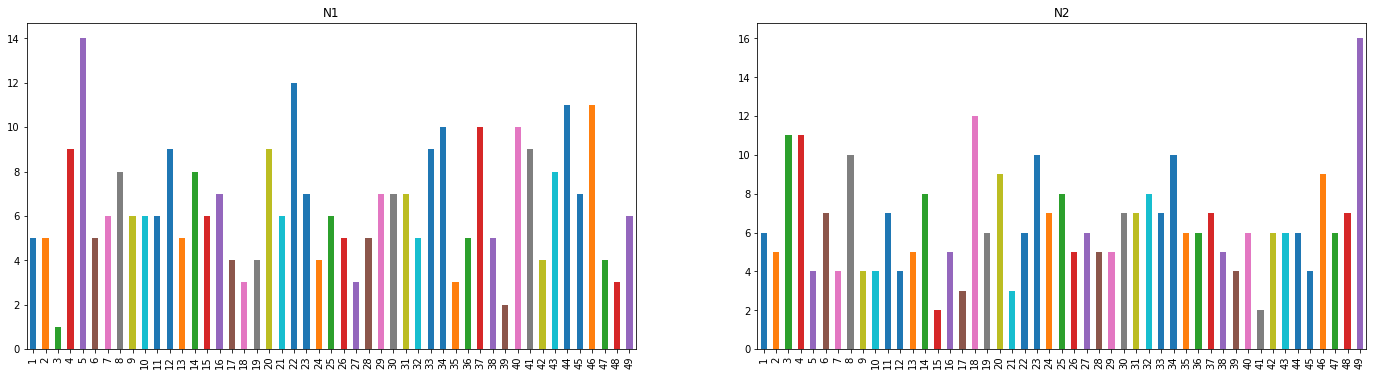

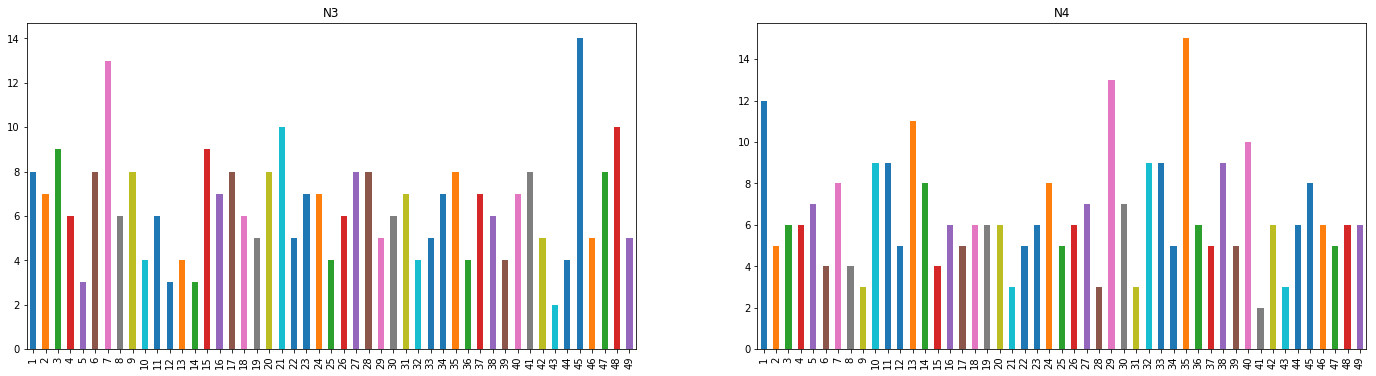

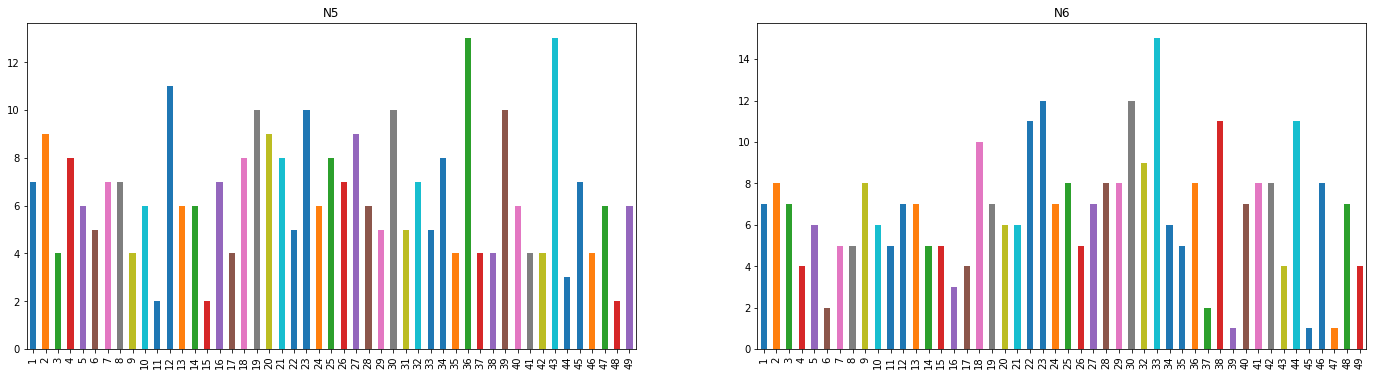

In [38]:

fig = plt.figure(figsize=(24,6))
ax1 = fig.add_subplot(121)
sample["N1"].value_counts().sort_index().plot.bar()
ax1.set_title('N1')
ax2 = fig.add_subplot(122)
sample["N2"].value_counts().sort_index().plot.bar()
ax2.set_title('N2')

fig = plt.figure(figsize=(24,6))
ax3 = fig.add_subplot(121)
sample["N3"].value_counts().sort_index().plot.bar()
ax3.set_title('N3')
ax4 = fig.add_subplot(122)
sample["N4"].value_counts().sort_index().plot.bar()
ax4.set_title('N4')

fig = plt.figure(figsize=(24,6))
ax5 = fig.add_subplot(121)
sample["N5"].value_counts().sort_index().plot.bar()
ax5.set_title('N5')
ax6 = fig.add_subplot(122)
sample["N6"].value_counts().sort_index().plot.bar()
ax6.set_title('N6')

In [39]:
# mark six logic
def check_mark_six(X, extra, ys, debug=False):
    
    d = 0
    e = 0
    for y in ys:
        if y in X:
            d += 1
        if y == extra:
            e = 1
    
    if d == 6:
        result= 1
    elif d == 5 and e==1:
        result= 2
    elif d == 5:
        result= 3
    elif d == 4 and e==1:
        result= 4
    elif d == 4:
        result= 5
    elif d == 3 and e==1:
        result= 6
    elif d == 3:
        result= 7
    else:
        result= 8
    
    if debug:
        print('debug', X, extra, ys, result)
    
    return result
    
# testing
check_mark_six([1,2,3,4,5,6], 7, [7,2,3,7,1,12,9])

6

# 1st order Markov chain

If the lottery output a number 19, we represent this state as $(19)$

Using history, we conclude the probability of the next number, say 20, by naive bayes $P(20 | 19)$

We then use Markov chain to generate sequence accordingly.

Text(0.5, 1.0, 'Distribution')

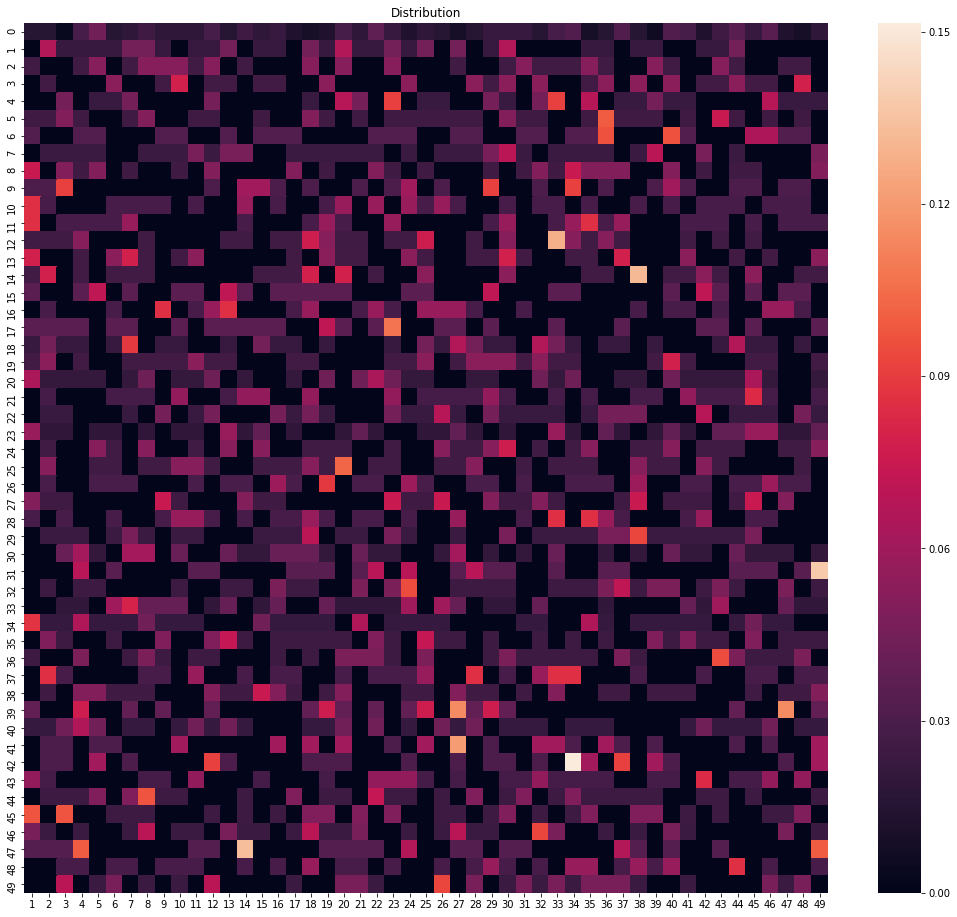

In [40]:
def naive_byes_1st_order(df):
    result = pandas.DataFrame(data=np.zeros((50, 49)), columns=range(1, 50))
    
    for index, row in df.iterrows():
        result.loc[0][row['N1']] +=1
        result.loc[row['N1']][row['N2']] +=1
        result.loc[row['N2']][row['N3']] +=1
        result.loc[row['N3']][row['N4']] +=1
        result.loc[row['N4']][row['N5']] +=1
        result.loc[row['N5']][row['N6']] +=1
        result.loc[row['N6']][row['S1']] +=1
        
    return result.div(result.sum(axis=1), axis=0)

test_dist = naive_byes_1st_order(sample)

fig = plt.figure(figsize=(18,16))
sns.heatmap(test_dist)
plt.title("Distribution")

# 2nd order Markov chain

If the lottery output was 17 and 19, we represent this state as $(17, 19)$

Using history, we conclude the probability of the next number, say 20, by naive bayes $P(20 | 17, 19)$

We then use Markov chain to generate sequence accordingly.

Text(0.5, 1.0, 'Rest distribution')

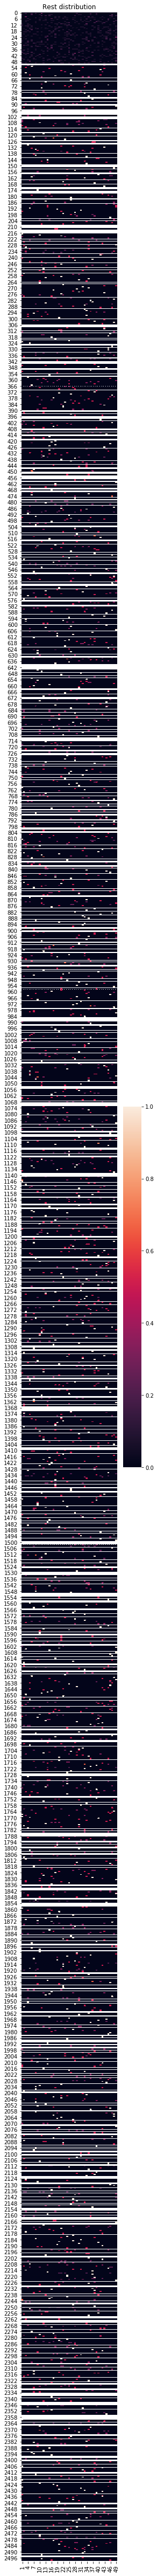

In [25]:
def naive_byes_2nd_order(df):
    # total state = 1 (init) + 49 (first N) + 50 X 49 = 50 x 50
    result = pandas.DataFrame(data=np.zeros((2500, 49)), columns=range(1, 50))
    
    for index, row in df.iterrows():
        result.loc[0][row['N1']] +=1
        result.loc[row['N1']][row['N2']] +=1
        result.loc[row['N1'] * 50 + row['N2']][row['N3']] +=1
        result.loc[row['N2'] * 50 + row['N3']][row['N4']] +=1
        result.loc[row['N3'] * 50 + row['N4']][row['N5']] +=1
        result.loc[row['N4'] * 50 + row['N5']][row['N6']] +=1
        result.loc[row['N5'] * 50 + row['N6']][row['S1']] +=1
        
    return result.div(result.sum(axis=1), axis=0)

test_dist_2 = naive_byes_2nd_order(sample)

#fig = plt.figure(figsize=(16,4))
#test_dist_2.loc[0].plot.bar()
#plt.title("First number distribution")

#fig = plt.figure(figsize=(12,10))
#sns.heatmap(test_dist_2[1:50])
#plt.title("Second number distribution")

fig = plt.figure(figsize=(4,87))
sns.heatmap(test_dist_2)
plt.title("Rest distribution")

# Conclusion

1. Sample distribution should works, because the underlying distribution is considered bias.
2. First order markov chain should works, we can spot some dark sport (high prob)
3. Second order markov chain is not going to works, no enough data to build the model, the model has 125000 params, while data can only provide 13026 sample. 10% of the total parameters. Interesting spot does exists.

In [41]:
def game_stat(result_history, bets, N):
    resample_i = np.floor(np.random.rand(N)*len(result_history)).astype(int)
    
    result = pandas.DataFrame(data=np.zeros((9, N)), index=range(0,9))
    
    for i, ri in enumerate(resample_i):
        x = game(result_history.loc[ri], bets)
        result[i] =x
    
    return result

def game(winning_bet, bets):
    result = np.zeros(9)
    for bet in bets:
        #win_num  = as.vector()
        win_num = winning_bet[['N1','N2','N3','N4','N5','N6']].values.flatten().tolist()
        rr = check_mark_six(win_num, winning_bet['S1'], bet)
        result[rr] += 1
        
    return result

In [42]:
# testing, first use uniform random as base line
def generate_random_uniform():
    return np.random.choice(range(1,50), size=7, replace=False)

bets = []
for i in range(10000):
    bets.append(generate_random_uniform())
    
win_stat_random = game_stat(sample, bets, 1)

display(win_stat_random[1:])

,0
1,0.0
2,0.0
3,0.0
4,1.0
5,26.0
6,31.0
7,264.0
8,9678.0


In [43]:
# testing, use simple sample statistic 
def generate_simple_stat():
    return np.random.choice(range(1, 50), size=7, replace=False, p=all_num_cnt_norm)

bets = []
for i in range(10000):
    bets.append(generate_simple_stat())
    
win_stat_simple = game_stat(sample, bets, 1)

display(win_stat_simple[1:])

,0
1,0.0
2,0.0
3,1.0
4,0.0
5,20.0
6,23.0
7,286.0
8,9670.0


In [44]:
def generate_1st_markov():
    gen_nums = []
    w1 = 0
    while len(gen_nums) < 7:
        t = np.random.choice(range(1, 50), p=test_dist.loc[w1])
        if t in gen_nums:
            continue
        w1 = t
        gen_nums.append(t)
    
    return gen_nums

bets = []
for i in range(10000):
    bets.append(generate_1st_markov())

win_stat_markov = game_stat(sample, bets, 1)

display(win_stat_markov[1:])

,0
1,0.0
2,0.0
3,1.0
4,1.0
5,28.0
6,25.0
7,333.0
8,9612.0


# Payoff
頭獎	選中6個「攪出號碼」	獎金會因應該期獲中頭獎注數而有所不同，每期頭獎獎金基金 訂為不少於港幣800萬元。

二獎	選中5個「攪出號碼」+「特別號碼」	獎金會因應該期獲中二獎注數而有所不同
 
三獎	選中5個「攪出號碼」	獎金會因應該期獲中三獎注數而有所不同 下限獎金19,200元

四獎	選中4個「攪出號碼」+「特別號碼」	固定獎金港幣9,600元

五獎	選中4個「攪出號碼」	固定獎金港幣640元

六獎	選中3個「攪出號碼」+「特別號碼」	固定獎金港幣320元

七獎	選中3個「攪出號碼」	固定獎金港幣40元

In [45]:
payoff = [0, 8000000, 384000, 19200, 9600, 640, 320, 40, 0]
print("Money spent: %d\n" % (10000*20))

print("Random strategy: %d" % (win_stat_random.values.T * payoff).sum())
print("Simple stat strategy: %d" % (win_stat_simple.values.T * payoff).sum())
print("Markov strategy: %d" % (win_stat_markov.values.T * payoff).sum())

Money spent: 200000

Random strategy: 46720
Simple stat strategy: 50800
Markov strategy: 68040


## Generate lucky number

In [46]:
def generate_1st_markov():
    gen_nums = []
    w1 = 0
    while len(gen_nums) < 7:
        t = np.random.choice(range(1, 50), p=test_dist.loc[w1])
        if t in gen_nums:
            continue
        w1 = t
        gen_nums.append(t)
    
    return gen_nums

bets = []
for i in range(10):
    bets.append(generate_1st_markov())
    
print(bets)

[[32, 29, 18, 15, 19, 4, 3], [15, 34, 3, 24, 48, 39, 1], [23, 26, 31, 33, 24, 5, 8], [27, 38, 33, 13, 30, 3, 48], [34, 45, 35, 22, 23, 41, 3], [5, 18, 34, 8, 23, 39, 4], [12, 30, 8, 33, 6, 36, 45], [5, 43, 48, 34, 1, 3, 10], [29, 45, 23, 10, 24, 5, 43], [22, 26, 29, 45, 30, 5, 28]]


In [47]:
def generate_simple_stat():
    return np.random.choice(range(1, 50), size=7, replace=False, p=all_num_cnt_norm)

bets = []
for i in range(10):
    bets.append(generate_simple_stat())
    
print(bets)

[array([45, 20,  7,  2, 41, 29,  1]), array([ 8, 41, 14, 44, 40, 16, 19]), array([29, 41, 18, 15, 32, 46, 49]), array([ 7,  5, 35, 12, 29, 10, 21]), array([10,  3, 48,  8, 25, 49,  5]), array([40, 14, 22, 30, 48, 15,  4]), array([29, 15, 19, 49, 35, 43, 38]), array([ 3,  8, 18,  7, 49, 14, 24]), array([44, 32, 36, 38, 22, 49, 13]), array([19, 13, 23, 27, 14, 49,  4])]
